# Module Load-in

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

from scipy.integrate import simpson
from scipy.integrate import cumulative_trapezoid

# Auswertung ZIF Hydrogen Loading 12 

## Einstein Relation

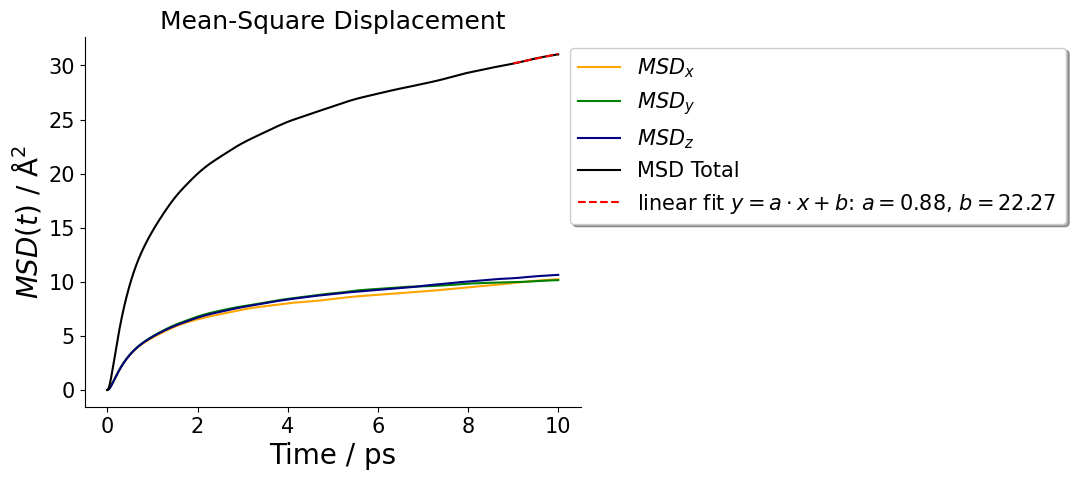

In [56]:
# Plot MSD
mpl.rcParams["font.size"] = 15
mpl.rcParams["axes.labelsize"] = 20

data = np.genfromtxt("diff.out")
steps = data[:,0]
time = steps*0.002
MSD_x = data[:,1]
MSD_y = data[:,2]
MSD_z = data[:,3]
MSD_xyz = MSD_x + MSD_y + MSD_z

plt.plot(time, MSD_x,label="$MSD_x$",color="orange")
plt.plot(time,MSD_y,label="$MSD_y$",color="green")
plt.plot(time,MSD_z, label="$MSD_z$",color="navy")
plt.plot(time,MSD_xyz,label="MSD Total",color="black")

# make a ruve fit

# linear regression formula

def linear_regression(x,a,b):
    return a*x + b

popt, pcov = curve_fit(linear_regression, time[-500:],MSD_xyz[-500:])

plt.plot(time[-500:],linear_regression(time[-500:],*popt),color="red",linestyle="dashed",label=r"linear fit $y=a\cdot x + b$: $a= {:.2f}$, $b= {:.2f}$ ".format(popt[0],popt[1]))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Mean-Square Displacement")
plt.xlabel("Time / ps")
plt.ylabel("$MSD(t)$ / \u212B$^2$")
plt.legend(loc="upper right", bbox_to_anchor=[1, 0, 1, 1], shadow=True)


plt.show()

# Velocity Autocorrelation

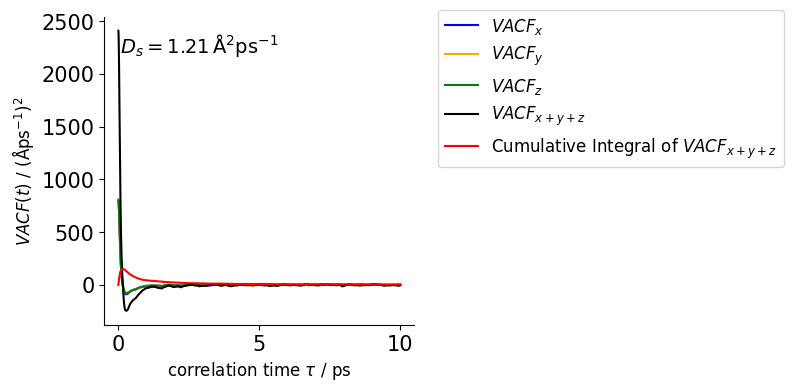

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.integrate import cumulative_trapezoid
import matplotlib as mpl

mpl.rcParams["font.size"] = 15
mpl.rcParams["axes.labelsize"] = 12

data = np.genfromtxt("green_kubo.out")
time = data[:,0]
VACF_x = data[:,1]
VACF_y = data[:,2]
VACF_z = data[:,3]
VACF_xyz = data[:,4]


integral_VACF_xyz = simpson(VACF_xyz, x=time)
cumulative_integral = cumulative_trapezoid(VACF_xyz, time, initial=0)
d_green_kubo = integral_VACF_xyz / 3

fig, axs = plt.subplots(1,figsize=(4,4))
axs.plot(time,VACF_x,label=r"$VACF_x$",color="blue")
axs.plot(time,VACF_y,label=r"$VACF_y$",color="orange")
axs.plot(time,VACF_z,label=r"$VACF_z$",color="green")
axs.plot(time,VACF_xyz,label=r"$VACF_{x+y+z}$",color="black")
axs.plot(time, cumulative_integral, label=r'Cumulative Integral of $VACF_{x+y+z}$',color="red")

axs = plt.gca()
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)


axs.text(0.05, 0.95, r"$D_s = %.2f \, \mathrm{\AA^2 ps^{-1}}$" %(d_green_kubo), transform=axs.transAxes, fontsize=14, verticalalignment='top')


axs.set_xlabel(r"correlation time $\tau$ / ps")
axs.set_ylabel(r"$VACF(t)$ / $\mathrm{(\AA ps^{-1})^{2}}$")
axs.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

## Empty Zif Box Parameter Plot

          steps        Box          1          2     3     4     5
0        20.002  17.095006  17.095006  17.095006  90.0  90.0  90.0
1        20.004  17.095178  17.095178  17.095178  90.0  90.0  90.0
2        20.006  17.095294  17.095294  17.095294  90.0  90.0  90.0
3        20.008  17.095336  17.095336  17.095336  90.0  90.0  90.0
4        20.010  17.095292  17.095292  17.095292  90.0  90.0  90.0
...         ...        ...        ...        ...   ...   ...   ...
249995  519.992  17.089498  17.089498  17.089498  90.0  90.0  90.0
249996  519.994  17.089607  17.089607  17.089607  90.0  90.0  90.0
249997  519.996  17.089702  17.089702  17.089702  90.0  90.0  90.0
249998  519.998  17.089769  17.089769  17.089769  90.0  90.0  90.0
249999  520.000  17.089813  17.089813  17.089813  90.0  90.0  90.0

[250000 rows x 7 columns]


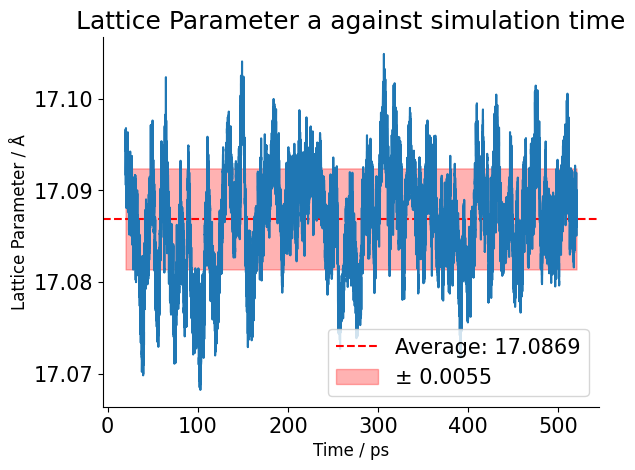

In [73]:
box_data = pd.read_csv("zif_8_empty-03.box",names = ["steps","Box","1","2","3","4","5"],sep="\t")


# performed for 500 ps

steps = len(box_data.loc[:,"steps"])

time_per_step = 500 / steps

# Apply the transformation+

box_data["steps"] = box_data["steps"] * time_per_step

print(box_data)

# Add average and uncertanty
average = 17.0869
uncertainty = 0.0055

# Add the average line
plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average}')

# Add shaded region for the uncertainty
plt.fill_between(box_data["steps"], 
                 average - uncertainty, 
                 average + uncertainty, 
                 color='r', alpha=0.3, label=f'± {uncertainty}')


plt.plot(box_data.loc[:,"steps"],box_data.loc[:,"Box"])

plt.title("Lattice Parameter a against simulation time")
plt.xlabel("Time / ps")
plt.ylabel("Lattice Parameter / \u212B")
plt.legend(loc="lower right")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()
